#### Prepare a classification model using Naive Bayes for salary data 
Data Description:
+ age--age of a person
+ workclass--A work class is a grouping of work 
+ education--Education of an individuals	
+ maritalstatus--Marital status of an individulas	
+ occupation--occupation of an individuals
+ relationship-- 	
+ race--Race of an Individual
+ sex--Gender of an Individual
+ capitalgain--profit received from the sale of an investment	
+ capitalloss--A decrease in the value of a capital asset
+ hoursperweek--number of hours work per week	
+ native--Native of an individual
+ Salary--salary of an individual

## Naive Bayes 
It is a popular classification algorithm in machine learning and statistics. It is a probabilistic model that is based on Bayes' theorem, which is a fundamental theorem in probability theory. Naive Bayes is particularly well-suited for text classification tasks, such as spam detection and sentiment analysis, but it can be applied to a wide range of classification problems.

Here's how the Naive Bayes classification model works:

1. **Bayes' Theorem**: The foundation of the Naive Bayes algorithm is Bayes' theorem, which describes how to update the probability for a hypothesis (in this case, a class label) based on new evidence (the features of the data). The theorem is expressed as:

   P(class | features) = (P(features | class) * P(class)) / P(features)

   - P(class | features) is the probability of the class given the observed features.
   - P(features | class) is the probability of observing the features given the class.
   - P(class) is the prior probability of the class (the probability of the class occurring without any knowledge of the features).
   - P(features) is the probability of observing the features (a normalization constant).

2. **Independence Assumption**: The "naive" part of Naive Bayes comes from the assumption that all features are conditionally independent given the class label. This means that the presence or absence of one feature does not affect the presence or absence of another feature. This simplifying assumption is often made for computational efficiency, and despite its simplifications, Naive Bayes can perform surprisingly well in practice, especially for text data.

3. **Training**: To train a Naive Bayes classifier, you calculate the probabilities P(features | class) and P(class) from a labeled dataset. P(features | class) is estimated based on the training data, typically using techniques like maximum likelihood estimation or smoothing (e.g., Laplace smoothing). P(class) is also estimated from the training data by counting the occurrences of each class.

4. **Prediction**: To make predictions, you use Bayes' theorem to calculate P(class | features) for each class. The class with the highest probability becomes the predicted class.

There are different variations of the Naive Bayes algorithm, depending on the nature of the data and the underlying assumptions. Three common types of Naive Bayes classifiers are:

- **Gaussian Naive Bayes**: This is used when the features are continuous and assumed to have a Gaussian (normal) distribution.

- **Multinomial Naive Bayes**: This is often used for text data or any data with discrete features, where each feature represents a count or frequency.

- **Bernoulli Naive Bayes**: This is used when dealing with binary features, where each feature is either 0 or 1.

Despite its simplicity and the "naive" independence assumption, Naive Bayes can be surprisingly effective for many classification tasks, especially when dealing with high-dimensional data, such as text documents.

 **Here's a step-by-step overview of how the Naive Bayes algorithm works**:

1. **Data Preparation**:
   - **Data**: Gather a labeled dataset, where each data point is associated with a class label and a set of features. The features can be categorical or continuous.
   - **Feature Extraction/Engineering**: Preprocess and transform the features if necessary. For text data, common preprocessing steps include tokenization, stop-word removal, and stemming or lemmatization.

2. **Training**:
   - **Class Prior Probabilities (P(class))**: Calculate the prior probability of each class in the training dataset. This is done by counting the number of instances for each class and dividing it by the total number of instances.
   - **Feature Likelihoods (P(features | class))**: For each feature and each class, calculate the conditional probability of observing that feature given the class label. The specific calculation depends on the type of data:
     - For continuous data, you can assume a probability distribution (e.g., Gaussian distribution) and estimate the parameters (mean and variance) for each feature in each class.
     - For categorical data, calculate the probability of each category occurring within each class.
     - For binary data, calculate the probability of each binary value (0 or 1) for each feature in each class.

3. **Prediction**:
   - Given a new data point with a set of features, calculate the posterior probability for each class using Bayes' theorem:
     - **P(class | features)** = (P(features | class) * P(class)) / P(features)
   - For each class, compute this posterior probability.
   - Assign the data point to the class with the highest posterior probability (maximum a posteriori or MAP estimate). In mathematical terms:
     - Predicted Class = argmax(P(class | features)) for all classes

4. **Smoothing (Optional)**:
   - To avoid zero probabilities (especially with limited data), smoothing techniques like Laplace smoothing or add-one smoothing can be applied to adjust probability estimates.

5. **Model Evaluation**:
   - Assess the performance of the Naive Bayes model using appropriate evaluation metrics like accuracy, precision, recall, F1-score, or ROC curves, depending on the nature of the classification problem.

6. **Model Deployment**:
   - Once the Naive Bayes model is trained and evaluated, it can be deployed for making predictions on new, unseen data.

Naive Bayes is known for its simplicity, speed, and ability to perform well in various classification tasks, especially text classification (e.g., spam detection, sentiment analysis, document classification). However, it makes the strong assumption of feature independence, which may not hold true in all cases. Despite this simplification, Naive Bayes can be surprisingly effective in practice, and it serves as a useful baseline model for many classification problems.

In [1]:
# Supressing warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###### Calling Salary Train & Test Dataset

In [3]:
Train_data=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\12.Naive Bayes\SalaryData_Train.csv')
Train_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [4]:
Test_data=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\12.Naive Bayes\SalaryData_Test.csv')
Test_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


#### Data Understanding

**Shape of Datasets**

In [5]:
Train_data.shape

(30161, 14)

In [6]:
Test_data.shape

(15060, 14)

**Basic Informations**

In [7]:
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


**Descriptive Statistics**

In [9]:
Train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
Test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [11]:
Salary=Train_data.copy()

**Numerical & Categorical variables**

In [12]:
# Initialize empty lists to store numerical and categorical column names
numerical_vars=[]
categorical_vars=[]

# Iterate through each column in the DataFrame
for column in Train_data.columns:
    # Check if the column has a numeric data type
    if pd.api.types.is_numeric_dtype(Train_data[column]):
        numerical_vars.append(column)
    else:
        categorical_vars.append(column)

# Print the numerical and categorical variables
print("Numerical variables:")
print(numerical_vars)
print("\nCategorical variables:")
print(categorical_vars)

Numerical variables:
['age', 'educationno', 'capitalgain', 'capitalloss', 'hoursperweek']

Categorical variables:
['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']


**Discrete & Continuous Numeric Variable**

In [13]:
# Initialize empty lists to store discrete and continuous column names
discrete_vars=[]
continuous_vars=[]

# Set a threshold for the number of unique values to determine discreteness
unique_value_threshold=25  # You can adjust this threshold as needed

# Iterate through each column in the DataFrame
for column in Train_data.columns:
    # Check if the column has a numeric data type
    if pd.api.types.is_numeric_dtype(Train_data[column]):
        unique_values=Train_data[column].nunique()
        if unique_values<=unique_value_threshold:
            discrete_vars.append(column)
        else:
            continuous_vars.append(column)

# Print the discrete and continuous variables
print("Discrete variables:")
print(discrete_vars)
print("\nContinuous variables:")
print(continuous_vars)

Discrete variables:
['educationno']

Continuous variables:
['age', 'capitalgain', 'capitalloss', 'hoursperweek']


**Frequency Count**

Finding the frequency count of categorical variables is an essential step in the data analysis process for several reasons:

1. **Understanding the Data Distribution:** By calculating the frequency count of each category within a categorical variable, you can gain insights into how the data is distributed. This information helps you understand which categories are more prevalent or rare in your dataset. It's a fundamental step in data exploration.

2. **Data Quality Check:** It allows you to quickly identify missing values, anomalies, or unexpected categories within the categorical variables. If you see unexpected or rare categories, it may indicate data quality issues or outliers.

3. **Feature Engineering:** Frequency counts can be used to create new features or modify existing ones. For example, you can create binary flags (0 or 1) to indicate whether a specific category is present or not, or you can create ordinal variables by mapping categories to numerical values based on their frequency.

4. **Statistical Analysis:** Frequency counts are crucial for performing statistical analyses, such as chi-squared tests or contingency tables, which are used to assess the relationships between categorical variables.

5. **Visualization:** Frequency counts are often used to create bar charts, histograms, or other visualizations to help you communicate and present your data effectively. Visualizing the distribution of categorical variables can provide valuable insights at a glance.

6. **Machine Learning:** In machine learning, encoding categorical variables with frequency counts can sometimes be a useful approach, especially when dealing with high-cardinality categorical variables. This technique can help models capture information about the relative frequency of categories.

In summary, calculating the frequency count of categorical variables is a fundamental step in data analysis and preparation. It provides a basis for understanding, cleaning, visualizing, and ultimately making informed decisions about your data.

**Cardinality**

It to the number of unique values or categories within a categorical variable. It is an important concept in data analysis and is relevant for several reasons:

1. **Data Exploration:** Cardinality helps you understand the diversity and granularity of the categorical variable. By knowing how many unique categories there are, you can get a sense of the data's complexity.

2. **Memory and Storage:** High cardinality categorical variables with a large number of unique values can consume a significant amount of memory and storage. Understanding the cardinality is essential for managing memory-efficient data storage and processing.

3. **Feature Engineering:** Cardinality influences feature engineering decisions. For example, if a categorical variable has very high cardinality, you might need to consider techniques like one-hot encoding, binary encoding, or target encoding to prepare it for machine learning models. High cardinality can also impact the choice of algorithms, as some models may struggle with such variables.

4. **Visualization:** Cardinality affects the effectiveness of visualization techniques. Creating bar charts or other visualizations for categorical variables with a large number of categories can result in cluttered and less informative plots. You may need to aggregate or subset the data for meaningful visualizations.

5. **Statistical Analysis:** Cardinality can impact statistical analyses involving categorical variables. For example, when conducting chi-squared tests or contingency table analyses, the expected frequency counts can become small and less reliable with high cardinality, potentially leading to misleading results.

6. **Model Performance:** In machine learning, high-cardinality categorical variables can lead to overfitting if not handled properly. Feature engineering techniques that reduce cardinality can help prevent this issue.

In summary, understanding the cardinality of categorical variables is crucial for effective data analysis and preparation. It guides decisions related to data exploration, data preprocessing, feature engineering, and the choice of statistical methods or machine learning algorithms. High cardinality can present challenges that require careful consideration and appropriate handling to ensure accurate and meaningful analysis and modeling.

In [14]:
# Initialize a dictionary to store frequency counts and cardinality
categorical_info={}

# Iterate through each column in the DataFrame
for column in Train_data.columns:
    # Check if the column has a non-numeric data type (i.e., categorical)
    if not pd.api.types.is_numeric_dtype(Train_data[column]):
        # Calculate the frequency count and cardinality
        frequency_count=Train_data[column].value_counts()
        cardinality=len(frequency_count)
        
        # Store the information in the dictionary
        categorical_info[column]={
            'Frequency Count':frequency_count,
            'Cardinality':cardinality
        }

# Print the frequency count and cardinality for each categorical variable
for column,info in categorical_info.items():
    print(f"Column:{column}")
    print(f"Frequency Count:\n{info['Frequency Count']}\n")
    print(f"Cardinality: {info['Cardinality']}\n")

Column:workclass
Frequency Count:
 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

Cardinality: 7

Column:education
Frequency Count:
 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

Cardinality: 16

Column:maritalstatus
Frequency Count:
 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64


Here **Native** column has higher cardinality as compared to remaining categorical columns.The safe number of cardinality (i.e., unique values or categories) that each categorical column can have depends on various factors, including the specific dataset, the machine learning algorithms you plan to use, and the computational resources available. However, as a general guideline, here are some considerations:

1. **Rule of Thumb:** A common rule of thumb is to consider a categorical variable with up to around 10-20 unique categories as having low to moderate cardinality. Variables with 20-50 unique categories can be considered moderate cardinality, and those with more than 50 unique categories are considered high cardinality.

2. **Machine Learning Algorithms:** Some machine learning algorithms are more sensitive to high cardinality than others. For example, decision trees and random forests can handle high cardinality well, while linear models like logistic regression may struggle with high cardinality variables. Neural networks and some clustering algorithms can also be sensitive to high cardinality.

3. **Data Size:** The size of your dataset matters. With a larger dataset, you can potentially handle higher cardinality because there is more data to learn from. However, you should still be cautious about excessive cardinality, as it can increase computational complexity and memory usage.

4. **Feature Engineering Techniques:** Depending on your dataset and problem, you can employ various feature engineering techniques to reduce cardinality. These include grouping rare categories into an "other" category, target encoding, binary encoding, or dimensionality reduction techniques like PCA or t-SNE.

5. **Domain Knowledge:** Consider the domain-specific context of your data. Some categorical variables may naturally have high cardinality, and that might be essential information for your analysis. In such cases, you might need to find ways to work with the high cardinality or use domain-specific knowledge to group categories sensibly.

6. **Computational Resources:** High cardinality categorical variables can significantly increase the dimensionality of your dataset, which can impact computational resources and processing time. Ensure that you have sufficient computational resources to handle the increased complexity.

7. **Model Performance:** Always keep model performance in mind. Test the impact of high cardinality on your chosen machine learning model. You can use techniques like cross-validation to assess model performance with different levels of cardinality.

In our case, with 9 categorical columns in a dataset with 30,161 rows, we can start by considering a moderate cardinality range (20-50 unique categories) as a guideline. 

#### Exploratory Data Analysis
**Cor-relation**

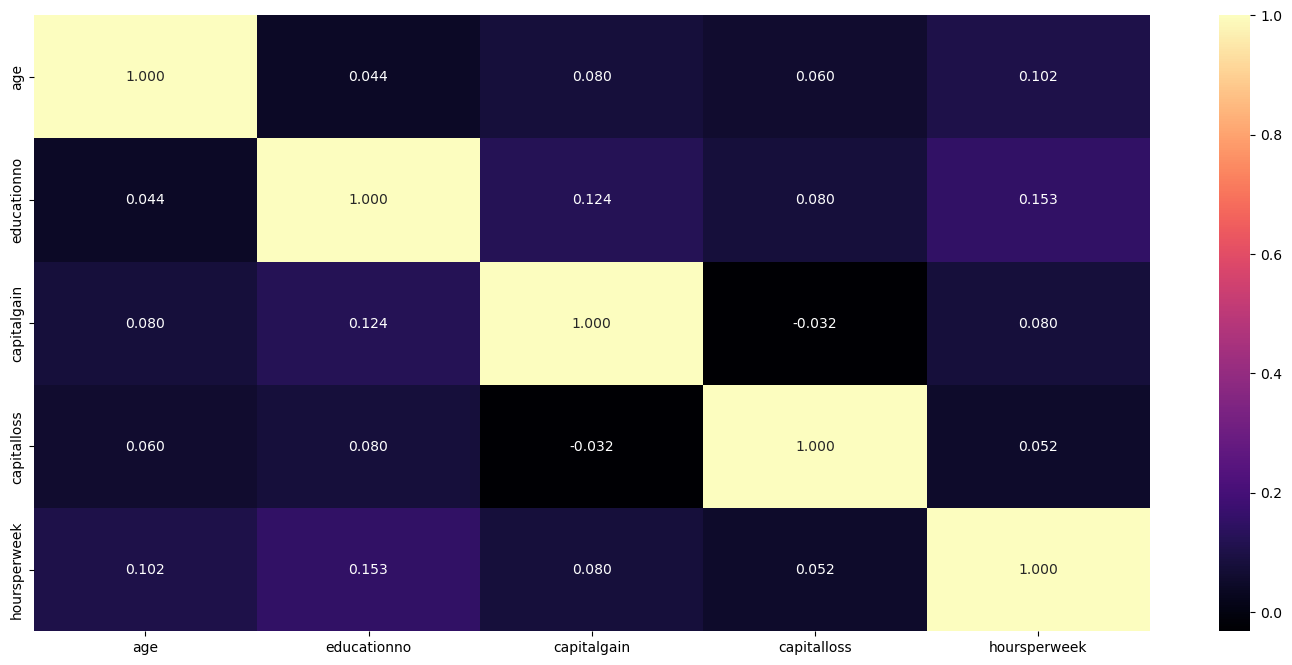

In [15]:
plt.figure(figsize=(18,8));
sns.heatmap(Train_data.corr(),cmap='magma',annot=True,fmt=".3f")
plt.show()

**Outlier Detection**

In [16]:
# Specify the numeric columns you want to check for outliers
numeric_columns=Train_data.select_dtypes(include=['number']).columns

#IQR Outliers
iqr_outliers={}
for column in numeric_columns:
    q1=Train_data[column].quantile(0.25)
    q3=Train_data[column].quantile(0.75)
    iqr=q3 - q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    outlier_indices=np.where((Train_data[column]<lower_bound)|(Train_data[column]>upper_bound))
    iqr_outliers[column]=Train_data[column].iloc[outlier_indices]

# Print the outliers
print("\nIQR Outliers:")
for column, outliers in iqr_outliers.items():
    if not outliers.empty:
        print(f"{column}:")
        print(outliers)


IQR Outliers:
age:
68       79
92       76
206      90
293      77
301      76
         ..
29469    80
29508    82
29900    90
29982    90
30071    85
Name: age, Length: 169, dtype: int64
educationno:
208      1
386      2
428      2
493      2
855      2
        ..
29927    2
29974    1
30018    2
30039    2
30045    1
Name: educationno, Length: 196, dtype: int64
capitalgain:
0         2174
8        14084
9         5178
55        5013
56        2407
         ...  
30121     3471
30124    99999
30141    15020
30148     1086
30160    15024
Name: capitalgain, Length: 2538, dtype: int64
capitalloss:
22       2042
30       1408
48       1902
88       1902
103      1887
         ... 
30054    1887
30056    1602
30058    1669
30070    1977
30107     880
Name: capitalloss, Length: 1426, dtype: int64
hoursperweek:
1        13
6        16
10       80
12       30
19       60
         ..
30144    30
30145    20
30148    60
30153    11
30159    20
Name: hoursperweek, Length: 7953, dtype: int64


**Outlier Visualization**

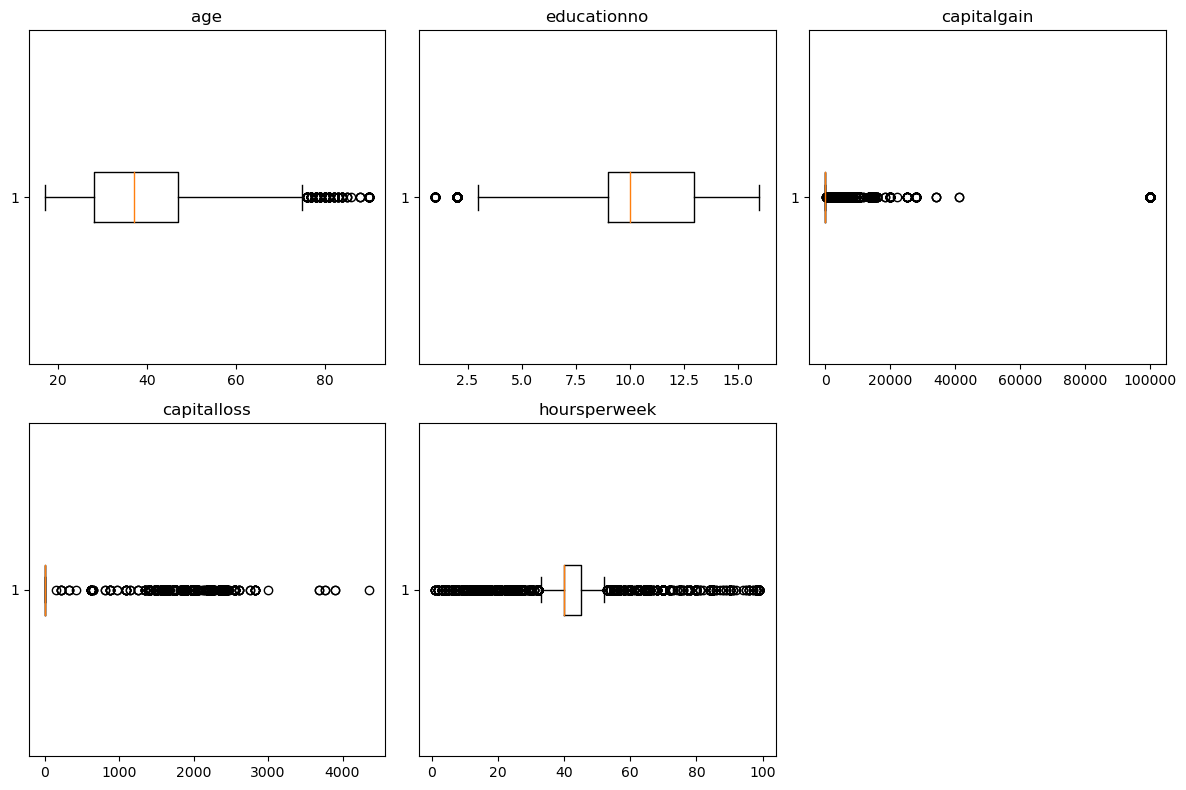

In [17]:
# Define the number of rows and columns for subplots
num_rows=2
num_cols=3

# Create a figure and subplots
fig,axes=plt.subplots(num_rows,num_cols,figsize=(12,8))

# Flatten the axes array for easy iteration
axes=axes.ravel()

# Create box plots for each numeric column
for i,column in enumerate(numeric_columns):
    if i<num_rows*num_cols:
        ax=axes[i]
        ax.boxplot(Train_data[column],vert=False)
        ax.set_title(column)

# Remove any empty subplots
for i in range(len(numeric_columns),num_rows*num_cols):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

**Distribution of Numeric Features**

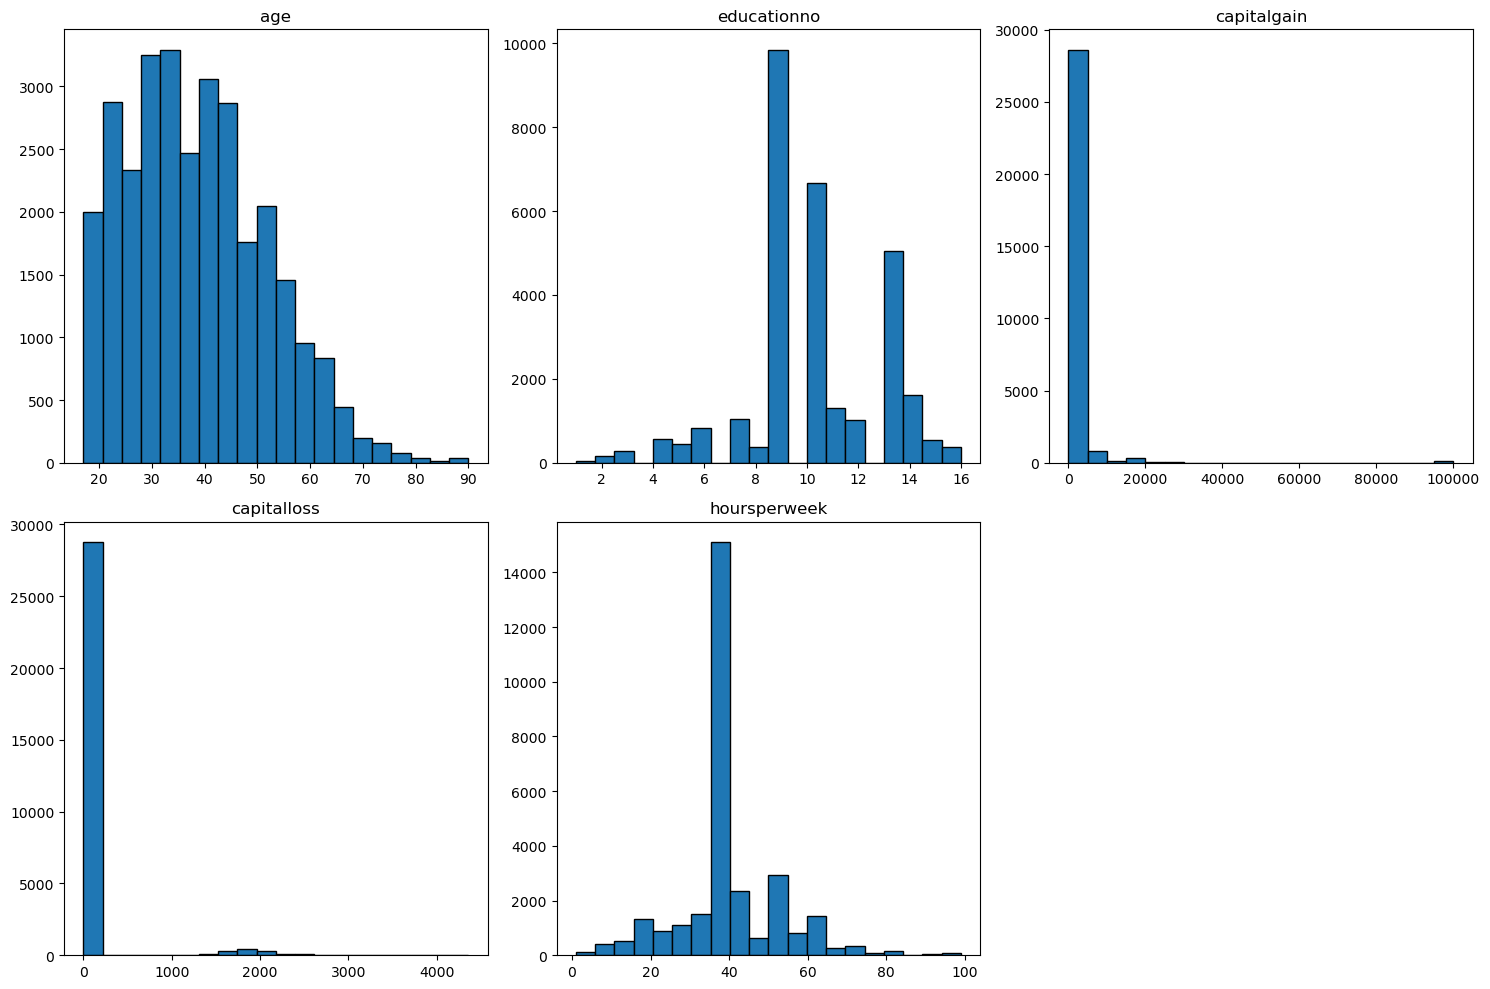

In [18]:
import math
# Calculate the number of rows and columns for subplots
num_cols=3 
num_rows=math.ceil(len(numeric_columns)/num_cols)

# Set the number of bins for the histograms
num_bins=20

# Create histograms for each numeric column
plt.figure(figsize=(15,10))
for i,column in enumerate(numeric_columns,1):
    plt.subplot(num_rows,num_cols,i)
    plt.hist(Train_data[column],bins=num_bins,edgecolor='k')
    plt.title(column)
    plt.tight_layout()

plt.show()

**Data Visualization of Categorical Features**

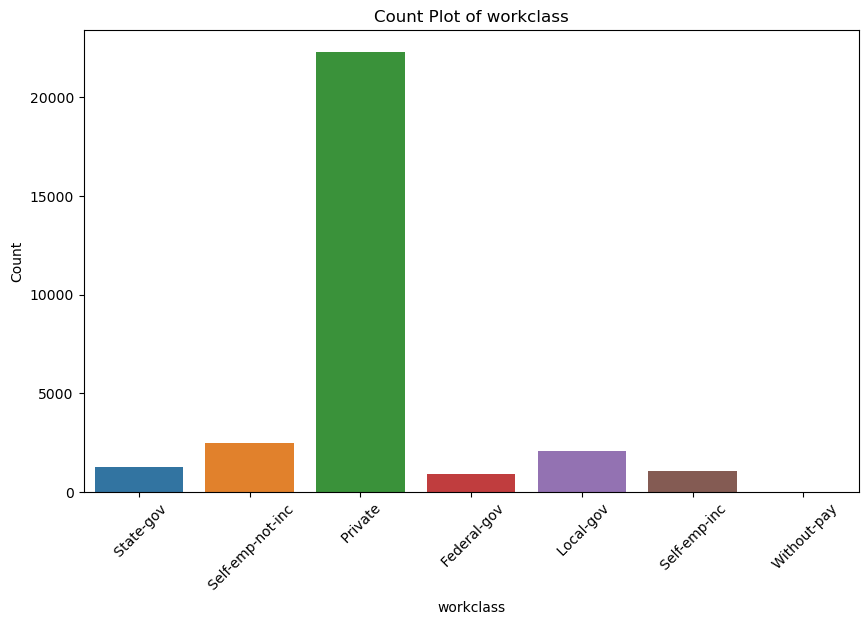

In [19]:
# Specify the categorical column you want to visualize
categorical_column ='workclass'

# Create a count plot for the categorical column using Seaborn
plt.figure(figsize=(10,6))
sns.countplot(data=Train_data,x=categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Count Plot of {categorical_column}')
plt.xticks(rotation=45)
plt.show()

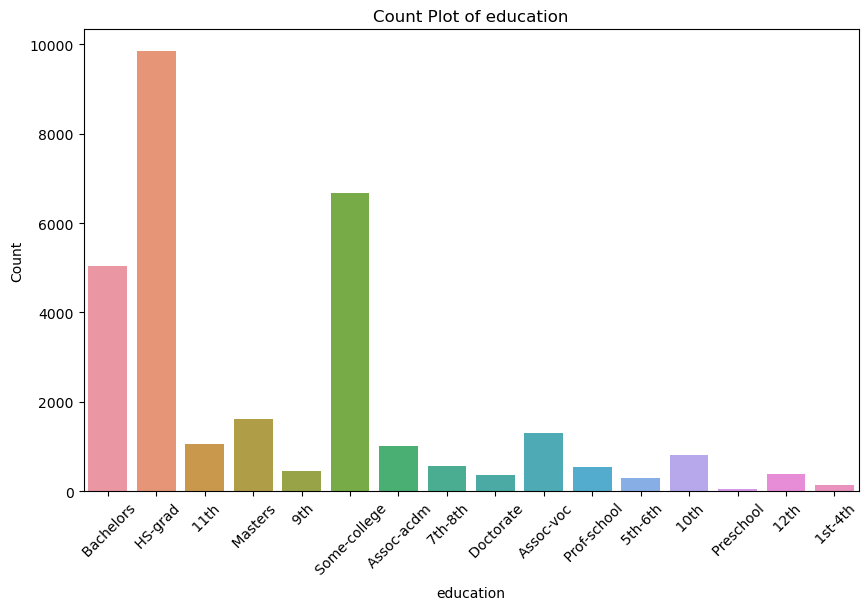

In [20]:
categorical_column='education'

# Create a count plot for the categorical column using Seaborn
plt.figure(figsize=(10,6))
sns.countplot(data=Train_data,x=categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Count Plot of {categorical_column}')
plt.xticks(rotation=45)
plt.show()

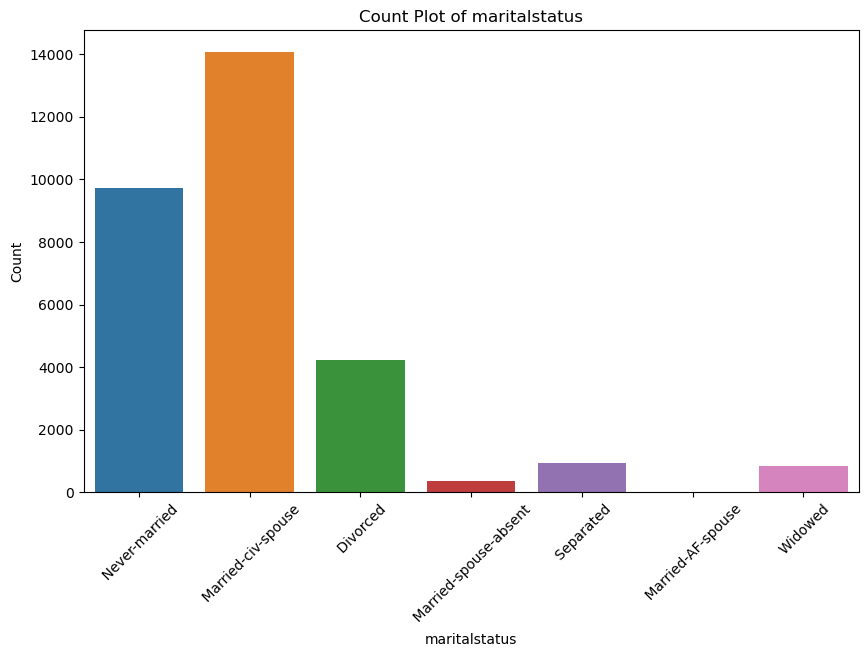

In [21]:
categorical_column='maritalstatus'

# Create a count plot for the categorical column using Seaborn
plt.figure(figsize=(10,6))
sns.countplot(data=Train_data,x=categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Count Plot of {categorical_column}')
plt.xticks(rotation=45)
plt.show()

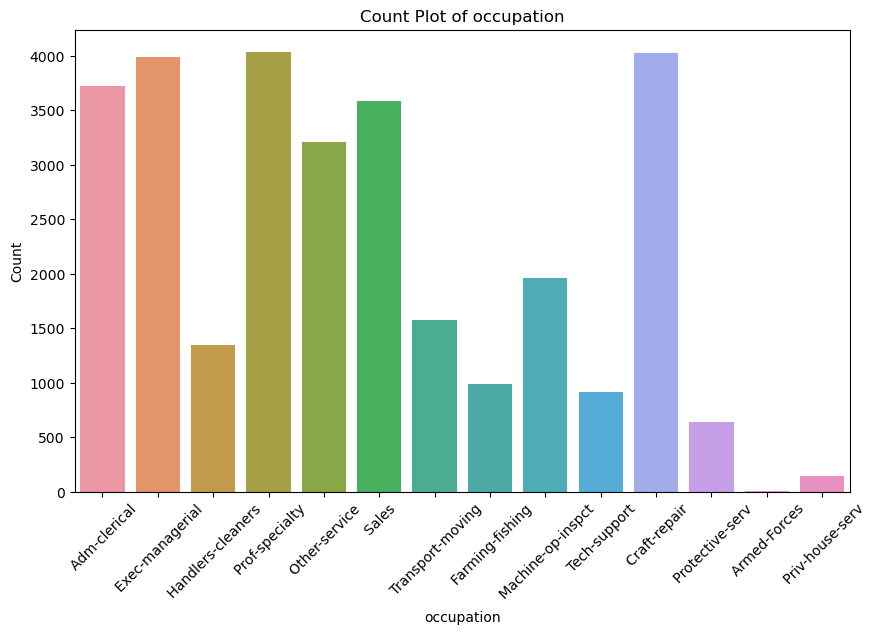

In [22]:
categorical_column='occupation'

# Create a count plot for the categorical column using Seaborn
plt.figure(figsize=(10,6))
sns.countplot(data=Train_data,x=categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Count Plot of {categorical_column}')
plt.xticks(rotation=45)
plt.show()

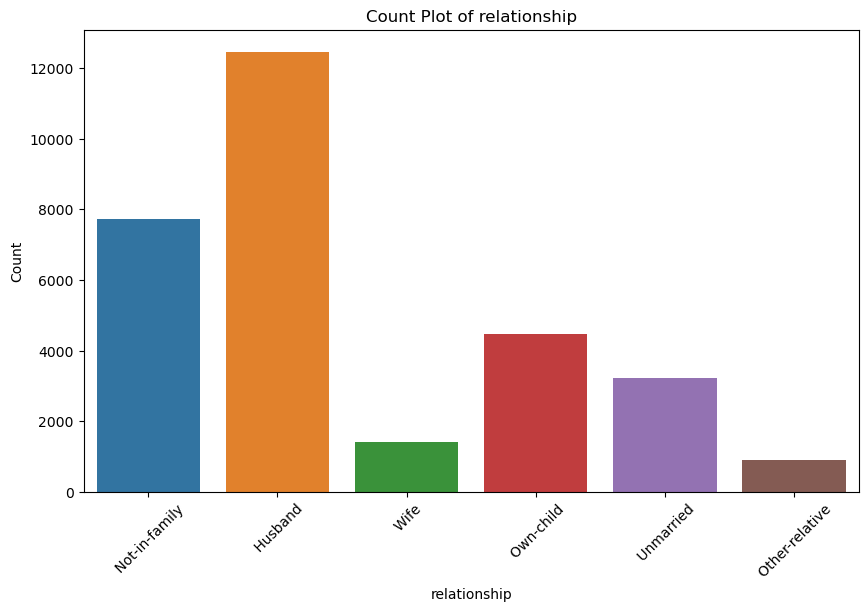

In [23]:
categorical_column='relationship'

# Create a count plot for the categorical column using Seaborn
plt.figure(figsize=(10,6))
sns.countplot(data=Train_data,x=categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Count Plot of {categorical_column}')
plt.xticks(rotation=45)
plt.show()

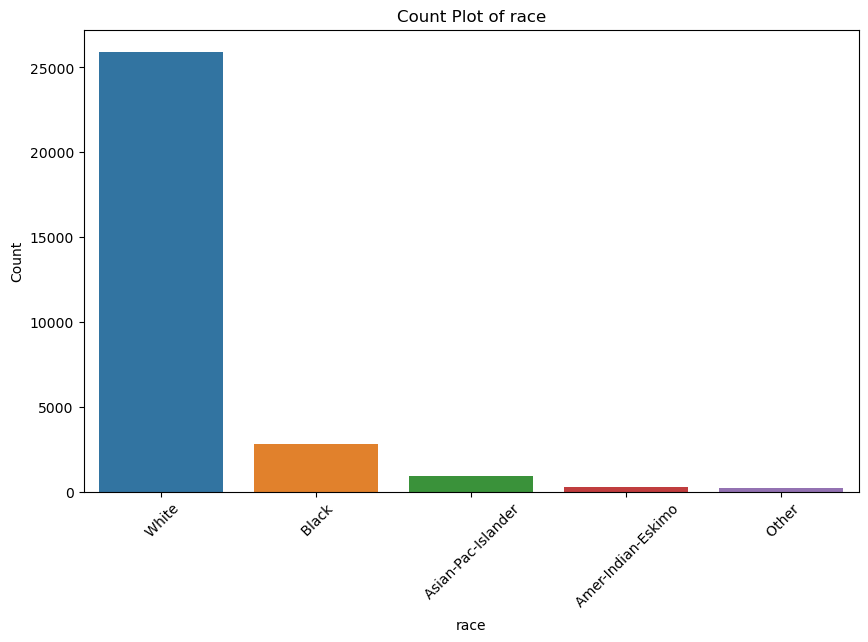

In [24]:
categorical_column='race'

# Create a count plot for the categorical column using Seaborn
plt.figure(figsize=(10,6))
sns.countplot(data=Train_data,x=categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Count Plot of {categorical_column}')
plt.xticks(rotation=45)
plt.show()

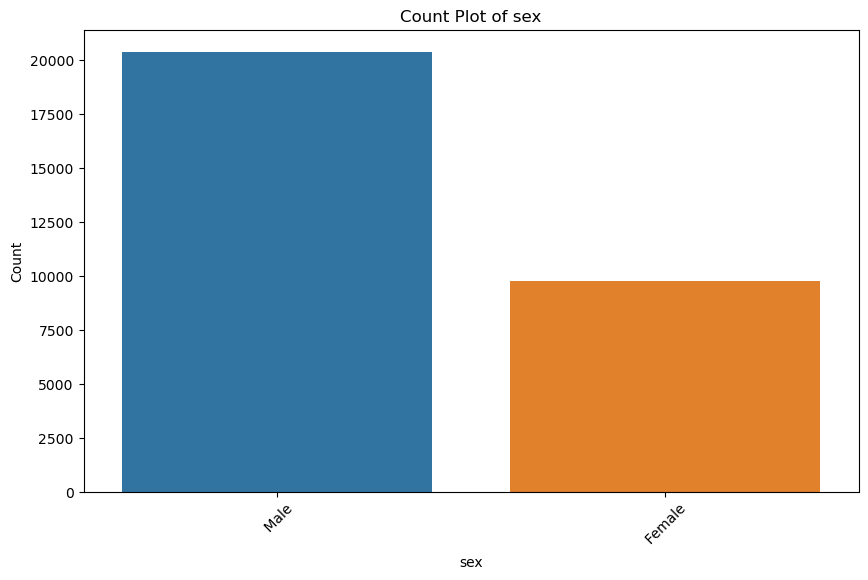

In [25]:
categorical_column='sex'

# Create a count plot for the categorical column using Seaborn
plt.figure(figsize=(10,6))
sns.countplot(data=Train_data,x=categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Count Plot of {categorical_column}')
plt.xticks(rotation=45)
plt.show()

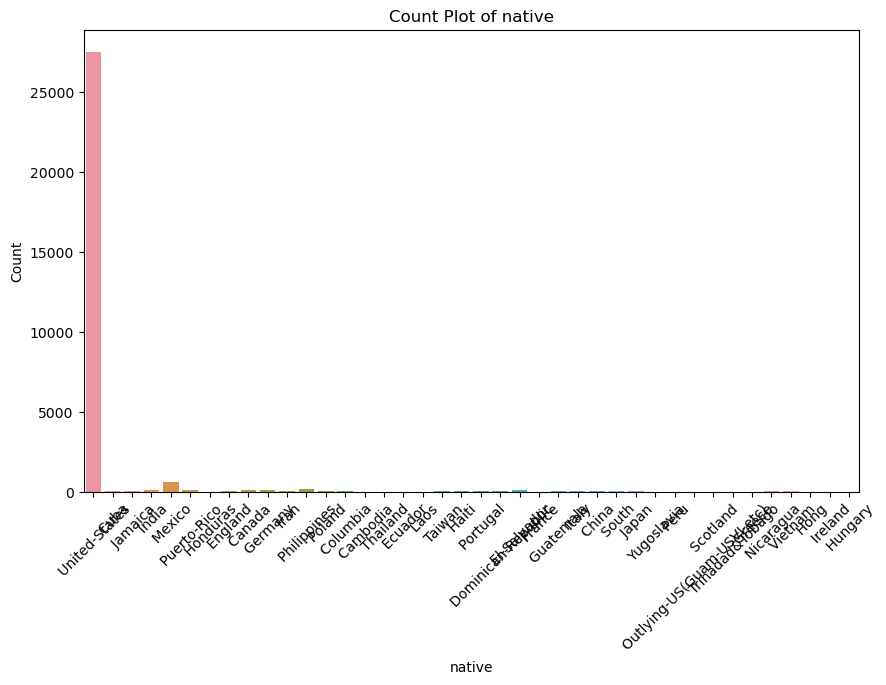

In [26]:
categorical_column='native'

# Create a count plot for the categorical column using Seaborn
plt.figure(figsize=(10,6))
sns.countplot(data=Train_data,x=categorical_column)
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Count Plot of {categorical_column}')
plt.xticks(rotation=45)
plt.show()

**Target Column**

In [27]:
count_lessthan_50k=len(Train_data[Train_data.Salary==' <=50K'])
count_greatthan_50k=len(Train_data[Train_data.Salary ==' >50K'])
print("Percentage of Employees with Salary greater than 50k: {:.2f}%".format((count_greatthan_50k/(len(Train_data.Salary))*100)))
print("Percentage of Employees with Salary lesser than 50k: {:.2f}%".format((count_lessthan_50k/(len(Train_data.Salary))*100)))

Percentage of Employees with Salary greater than 50k: 24.89%
Percentage of Employees with Salary lesser than 50k: 75.11%


In [28]:
Train_data.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

Text(0.5, 1.0, 'Salary')

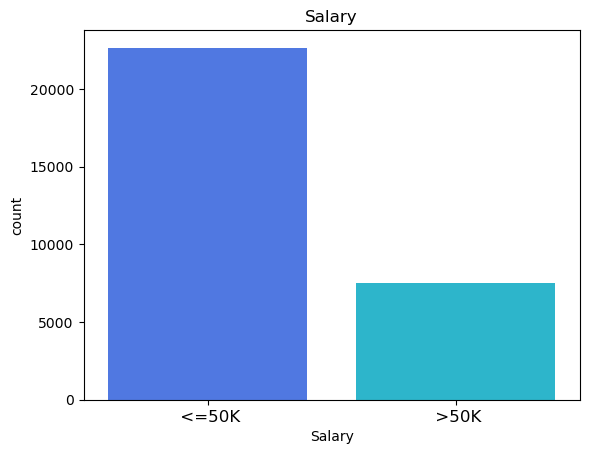

In [29]:
pal=sns.color_palette('rainbow')
sns.countplot(x='Salary',data=Train_data,palette=pal, 
              order=Train_data['Salary'].value_counts().index, );
plt.xticks(fontsize=12)
plt.title('Salary')

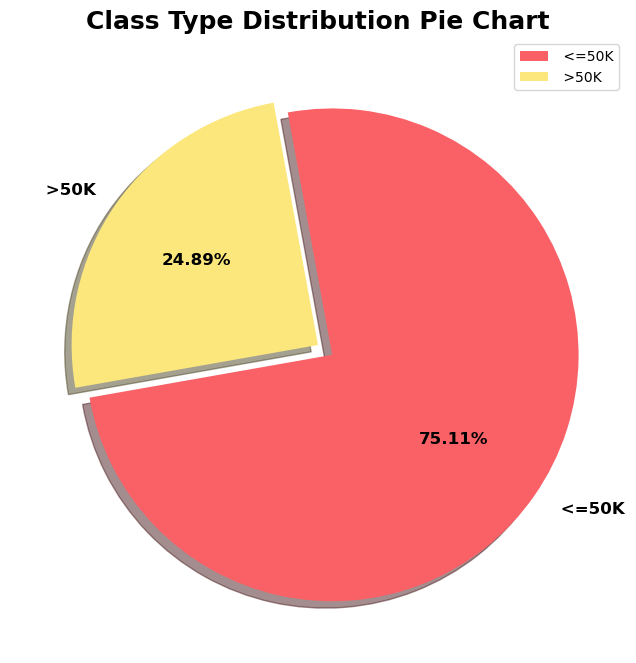

In [30]:
plt.figure(figsize=(12,8))
plt.pie(Train_data['Salary'].value_counts(),
       labels=Train_data.Salary.unique(),
       explode=[0.07,0.0],
       autopct='%.2f%%',
        colors=["#F96167","#FCE77D"],
       shadow=True,
       startangle=190,
       textprops={'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart",fontsize=18,fontweight='bold')
plt.show()

Our dataset is **Imbalanced**

**Imbalanced Data**:

+ In an imbalanced dataset, there is a significant disparity in the number of examples between different classes. One class (usually the majority class) has a much larger number of instances than the other(s) (the minority class).
+ Imbalanced data is common in real-world problems. For instance, in fraud detection, most transactions are legitimate (majority class), while fraudulent transactions are rare (minority class).
+ Imbalanced datasets can pose challenges for machine learning models because they tend to perform poorly on minority classes. Models can become biased towards the majority class, leading to poor classification of the minority class.

**Bivariate Visualization Categorical Features vs Target Feature**

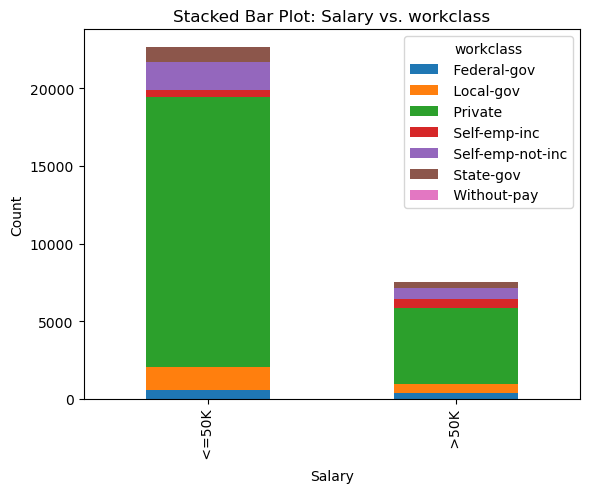

In [31]:
# Specify the two categorical variables
category1='Salary'
category2='workclass'

# Create a crosstab to count the combinations of categories
crosstab=pd.crosstab(Train_data[category1],Train_data[category2])

# Create a stacked bar plot
crosstab.plot(kind='bar',stacked=True)
plt.xlabel(category1)
plt.ylabel('Count')
plt.title(f'Stacked Bar Plot: {category1} vs. {category2}')
plt.show()

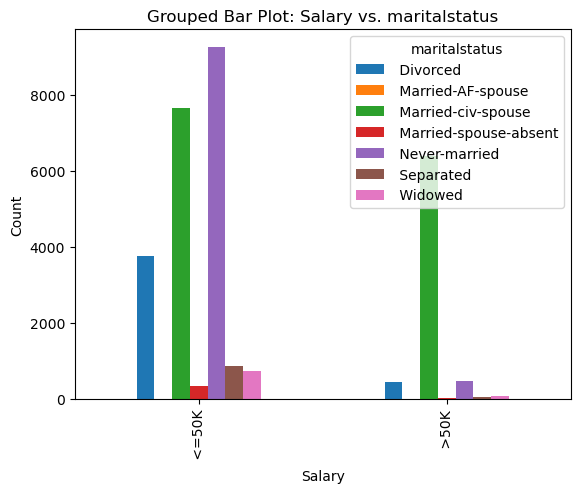

In [32]:
# Specify the two categorical variables
category1 ='Salary'
category2='maritalstatus'

# Create a crosstab to count the combinations of categories
crosstab=pd.crosstab(Train_data[category1],Train_data[category2])

# Create a grouped bar plot
crosstab.plot(kind='bar')
plt.xlabel(category1)
plt.ylabel('Count')
plt.title(f'Grouped Bar Plot: {category1} vs. {category2}')
plt.show()

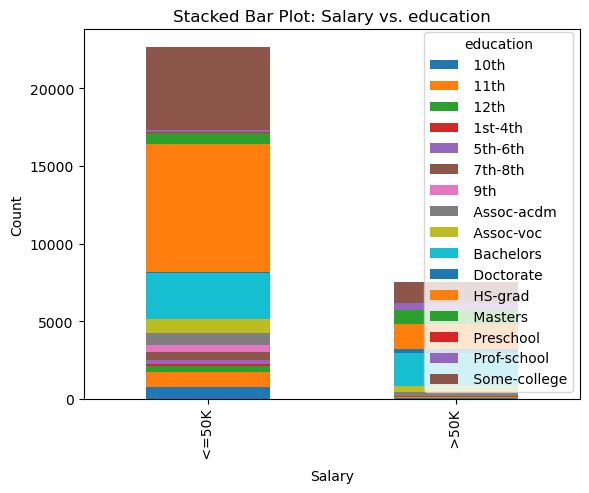

In [33]:
# Specify the two categorical variables
category1='Salary'
category2='education'

# Create a crosstab to count the combinations of categories
crosstab=pd.crosstab(Train_data[category1],Train_data[category2])

# Create a stacked bar plot
crosstab.plot(kind='bar',stacked=True)
plt.xlabel(category1)
plt.ylabel('Count')
plt.title(f'Stacked Bar Plot: {category1} vs. {category2}')
plt.show()

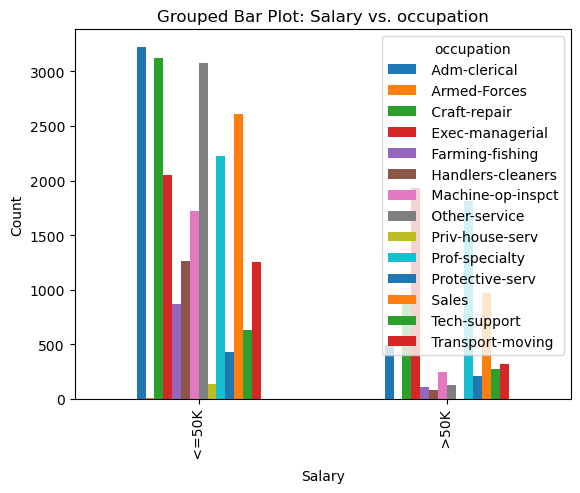

In [34]:
# Specify the two categorical variables
category1 ='Salary'
category2='occupation'

# Create a crosstab to count the combinations of categories
crosstab=pd.crosstab(Train_data[category1],Train_data[category2])

# Create a grouped bar plot
crosstab.plot(kind='bar')
plt.xlabel(category1)
plt.ylabel('Count')
plt.title(f'Grouped Bar Plot: {category1} vs. {category2}')
plt.show()

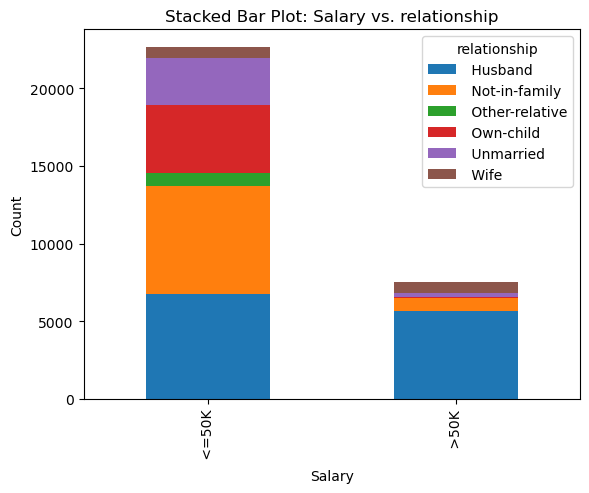

In [35]:
# Specify the two categorical variables
category1='Salary'
category2='relationship'

# Create a crosstab to count the combinations of categories
crosstab=pd.crosstab(Train_data[category1],Train_data[category2])

# Create a stacked bar plot
crosstab.plot(kind='bar',stacked=True)
plt.xlabel(category1)
plt.ylabel('Count')
plt.title(f'Stacked Bar Plot: {category1} vs. {category2}')
plt.show()

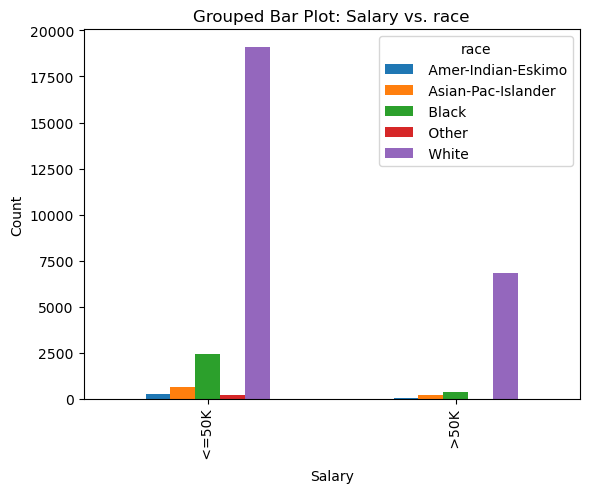

In [36]:
# Specify the two categorical variables
category1 ='Salary'
category2='race'

# Create a crosstab to count the combinations of categories
crosstab=pd.crosstab(Train_data[category1],Train_data[category2])

# Create a grouped bar plot
crosstab.plot(kind='bar')
plt.xlabel(category1)
plt.ylabel('Count')
plt.title(f'Grouped Bar Plot: {category1} vs. {category2}')
plt.show()

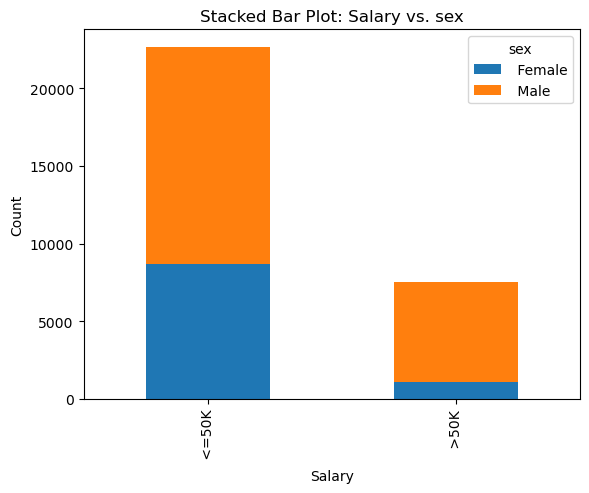

In [37]:
# Specify the two categorical variables
category1='Salary'
category2='sex'

# Create a crosstab to count the combinations of categories
crosstab=pd.crosstab(Train_data[category1],Train_data[category2])

# Create a stacked bar plot
crosstab.plot(kind='bar',stacked=True)
plt.xlabel(category1)
plt.ylabel('Count')
plt.title(f'Stacked Bar Plot: {category1} vs. {category2}')
plt.show()

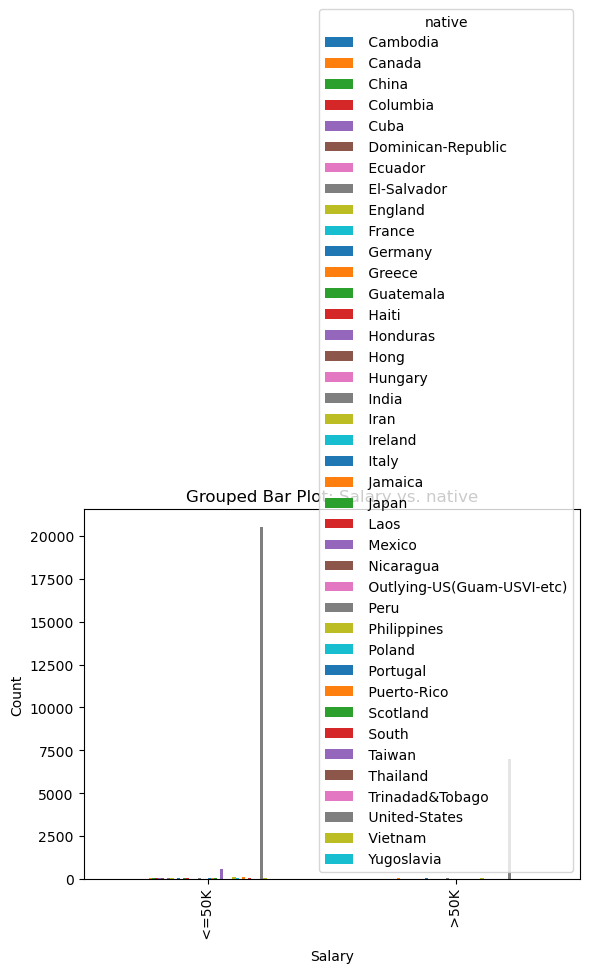

In [38]:
# Specify the two categorical variables
category1 ='Salary'
category2='native'

# Create a crosstab to count the combinations of categories
crosstab=pd.crosstab(Train_data[category1],Train_data[category2])

# Create a grouped bar plot
crosstab.plot(kind='bar')
plt.xlabel(category1)
plt.ylabel('Count')
plt.title(f'Grouped Bar Plot: {category1} vs. {category2}')
plt.show()

**Bivariate Visualization of Numeric Feature vs Target Feature**

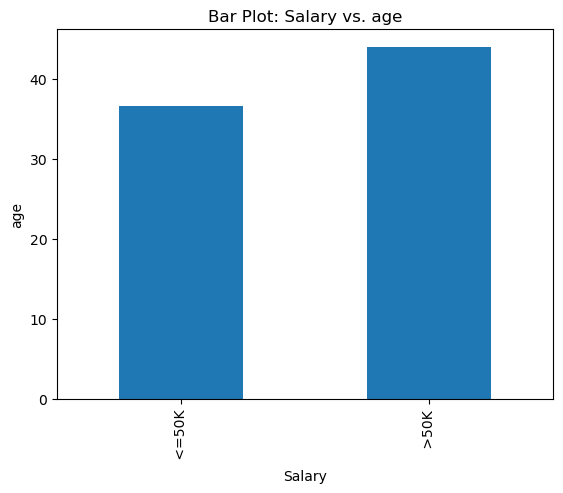

In [39]:
# Specify the categorical and continuous variables
categorical_variable='Salary'
continuous_variable='age'

# Create a bar plot
df_grouped=Train_data.groupby(categorical_variable)[continuous_variable].mean()
df_grouped.plot(kind='bar')
plt.xlabel(categorical_variable)
plt.ylabel(continuous_variable)
plt.title(f'Bar Plot: {categorical_variable} vs. {continuous_variable}')
plt.show()

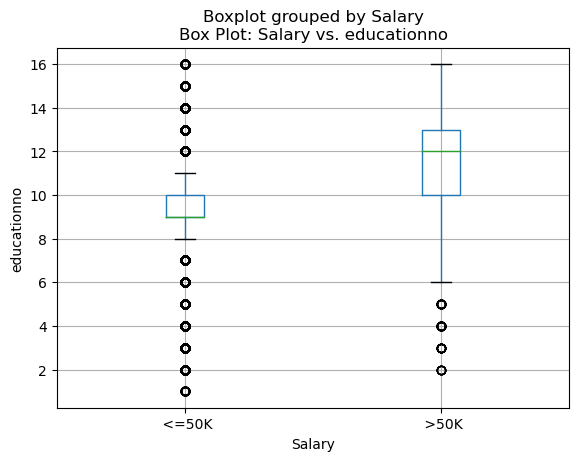

In [40]:
# Specify the categorical and continuous variables
categorical_variable='Salary'
continuous_variable='educationno'

# Create a box plot
Train_data.boxplot(column=continuous_variable,by=categorical_variable)
plt.xlabel(categorical_variable)
plt.ylabel(continuous_variable)
plt.title(f'Box Plot: {categorical_variable} vs. {continuous_variable}')
plt.show()

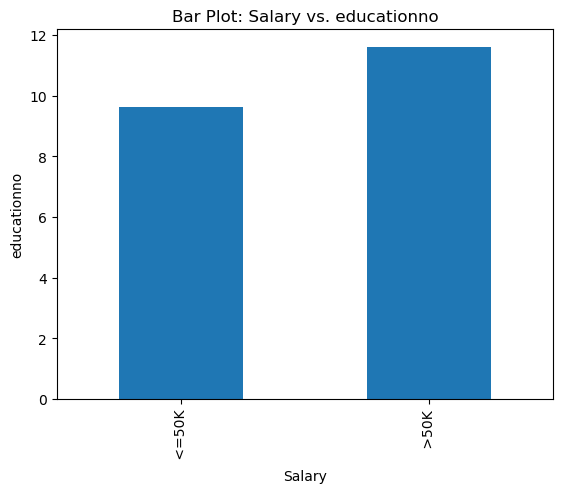

In [41]:
# Specify the categorical and continuous variables
categorical_variable='Salary'
continuous_variable='educationno'

# Create a bar plot
df_grouped=Train_data.groupby(categorical_variable)[continuous_variable].mean()
df_grouped.plot(kind='bar')
plt.xlabel(categorical_variable)
plt.ylabel(continuous_variable)
plt.title(f'Bar Plot: {categorical_variable} vs. {continuous_variable}')
plt.show()

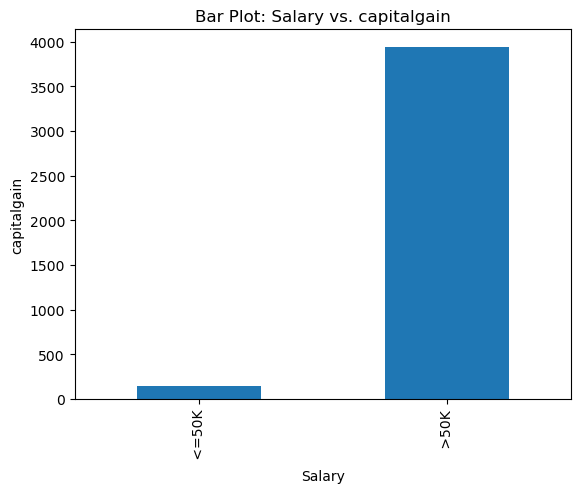

In [42]:
# Specify the categorical and continuous variables
categorical_variable='Salary'
continuous_variable='capitalgain'

# Create a bar plot
df_grouped=Train_data.groupby(categorical_variable)[continuous_variable].mean()
df_grouped.plot(kind='bar')
plt.xlabel(categorical_variable)
plt.ylabel(continuous_variable)
plt.title(f'Bar Plot: {categorical_variable} vs. {continuous_variable}')
plt.show()

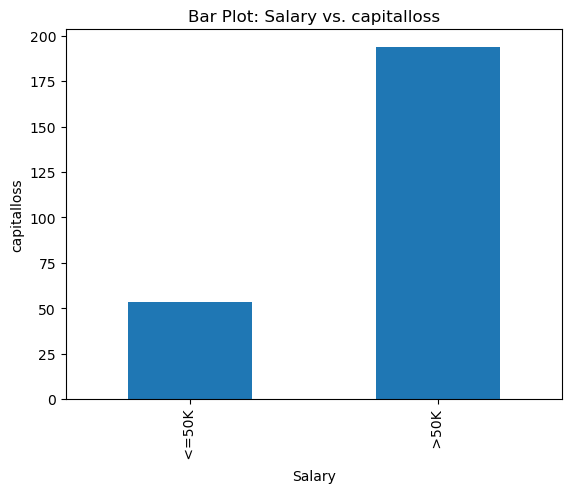

In [43]:
# Specify the categorical and continuous variables
categorical_variable='Salary'
continuous_variable='capitalloss'

# Create a bar plot
df_grouped=Train_data.groupby(categorical_variable)[continuous_variable].mean()
df_grouped.plot(kind='bar')
plt.xlabel(categorical_variable)
plt.ylabel(continuous_variable)
plt.title(f'Bar Plot: {categorical_variable} vs. {continuous_variable}')
plt.show()

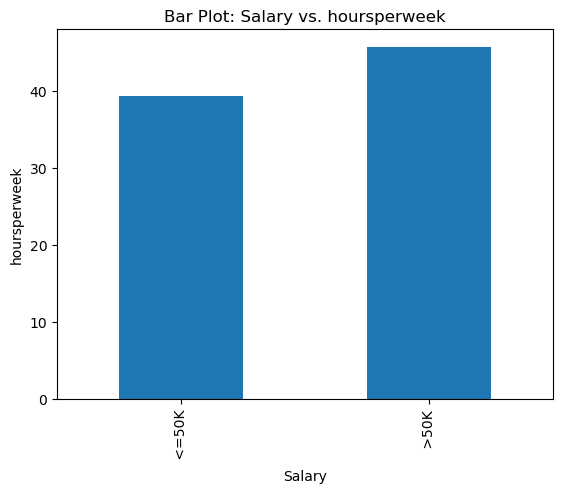

In [44]:
# Specify the categorical and continuous variables
categorical_variable='Salary'
continuous_variable='hoursperweek'

# Create a bar plot
df_grouped=Train_data.groupby(categorical_variable)[continuous_variable].mean()
df_grouped.plot(kind='bar')
plt.xlabel(categorical_variable)
plt.ylabel(continuous_variable)
plt.title(f'Bar Plot: {categorical_variable} vs. {continuous_variable}')
plt.show()

#### Data Pre-processing

**Encoding**

Encoding categorical variables is an essential step in preparing dataset for machine learning. Categorical variables need to be converted into numerical format because most machine learning algorithms work with numerical data.

+ **Label Encoding**:

  + Label encoding assigns a unique integer to each category in a categorical variable.
  + This method is suitable for ordinal categorical variables where the order of categories matters.

In [45]:
#For Train data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Train_data['workclass']=le.fit_transform(Train_data['workclass'])
Train_data['education']=le.fit_transform(Train_data['education'])
Train_data['maritalstatus']=le.fit_transform(Train_data['maritalstatus'])
Train_data['occupation']=le.fit_transform(Train_data['occupation'])
Train_data['relationship']=le.fit_transform(Train_data['relationship'])
Train_data['race']=le.fit_transform(Train_data['race'])
Train_data['sex']=le.fit_transform(Train_data['sex'])
Train_data['native']=le.fit_transform(Train_data['native'])
Train_data['Salary']=le.fit_transform(Train_data['Salary'])

In [46]:
Train_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0


In [47]:
#For Test data
le = LabelEncoder()
Test_data['workclass']=le.fit_transform(Test_data['workclass'])
Test_data['education']=le.fit_transform(Test_data['education'])
Test_data['maritalstatus']=le.fit_transform(Test_data['maritalstatus'])
Test_data['occupation']=le.fit_transform(Test_data['occupation'])
Test_data['relationship']=le.fit_transform(Test_data['relationship'])
Test_data['race']=le.fit_transform(Test_data['race'])
Test_data['sex']=le.fit_transform(Test_data['sex'])
Test_data['native']=le.fit_transform(Test_data['native'])
Test_data['Salary']=le.fit_transform(Test_data['Salary'])

In [48]:
Test_data.head(3)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1


In [49]:
Salary_Train=Train_data.copy()

In [50]:
Salary_Test=Test_data.copy()

#### Model Building with Imbalanced data

**Cross-validation**

It is a statistical technique used to assess the performance of a machine learning model and to mitigate issues related to overfitting and the choice of training and testing data splits. It involves dividing the dataset into multiple subsets, training the model on some of these subsets (training sets), and then evaluating the model's performance on the remaining subset(s) (validation or test sets). Cross-validation provides a more robust estimate of a model's performance compared to a single train-test split.Cross-validation can be applied to Naive Bayes models to evaluate their performance.

+ **Stratified K-Fold Cross-Validation**:

Stratified k-fold cross-validation is an extension of k-fold cross-validation that ensures each fold has a similar class distribution to the entire dataset.
This is especially important when dealing with imbalanced datasets, where some classes may have significantly fewer samples than others.
Stratified k-fold helps ensure that each class is represented well in both the training and testing sets.

In [51]:
X_train=Train_data.drop('Salary',axis=1)
y_train=Train_data[['Salary']]
X_test=Test_data.drop('Salary',axis=1)
y_test=Test_data[['Salary']]

**Gaussian Naive Bayes**

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Set the number of desired folds
n_splits=5  # You can change this to the desired number of folds

# Initialize a stratified k-fold object
stratified_kfold=StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=42)

# Initialize a list to store the accuracy scores for each fold
accuracy_scores=[]

# Convert y_train and y_test to 1D arrays (necessary for some versions of scikit-learn)
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

# Iterate through each fold
for train_index,test_index in stratified_kfold.split(X_train,y_train):
    # Split the data into training and testing sets for this fold
    X_fold_train,X_fold_test=X_train.iloc[train_index],X_train.iloc[test_index]
    y_fold_train,y_fold_test=y_train[train_index],y_train[test_index]

    # Initialize and train the Gaussian Naive Bayes classifier
    clf=GaussianNB()
    clf.fit(X_fold_train,y_fold_train)

    # Make predictions on the test set
    y_pred=clf.predict(X_fold_test)

    # Calculate the accuracy score for this fold
    accuracy=accuracy_score(y_fold_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate and print the mean accuracy score across all folds
mean_accuracy=np.mean(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')

Mean Accuracy: 0.80


In [53]:
print(accuracy)

0.7954244031830239


**Multinomial Naive Bayes**

In [54]:
from sklearn.naive_bayes import MultinomialNB

# Iterate through each fold
for train_index,test_index in stratified_kfold.split(X_train,y_train):
    # Split the data into training and testing sets for this fold
    X_fold_train,X_fold_test=X_train.iloc[train_index],X_train.iloc[test_index]
    y_fold_train,y_fold_test=y_train[train_index],y_train[test_index]

    # Initialize and train the Multinomial Naive Bayes classifier
    clf=MultinomialNB()
    clf.fit(X_fold_train,y_fold_train)

    # Make predictions on the test set
    y_pred=clf.predict(X_fold_test)

    # Calculate the accuracy score for this fold
    accuracy=accuracy_score(y_fold_test,y_pred)
    accuracy_scores.append(accuracy)

# Calculate and print the mean accuracy score across all folds
mean_accuracy=np.mean(accuracy_scores)
print(f'Mean Accuracy: {mean_accuracy:.2f}')

Mean Accuracy: 0.78


In [55]:
print(accuracy)

0.7722148541114059


**Addressing imbalanced data**:

There are various techniques to handle imbalanced data, including:
+ 1) **Resampling**: You can oversample the minority class (create copies of examples from the minority class) or undersample the majority class (remove some examples from the majority class) to rebalance the dataset.
+ 2) **Synthetic Data Generation**: Methods like SMOTE (Synthetic Minority Over-sampling Technique) can be used to generate synthetic examples for the minority class.
+ 3) **Cost-sensitive Learning**: Adjust the misclassification costs to give more importance to the minority class during model training.
+ 4) **Ensemble Methods**: Use ensemble techniques like Random Forest or Gradient Boosting, which can handle imbalanced data more effectively.
+ 5) **Anomaly Detection**: Treat the minority class as an anomaly detection problem.
+ 6) **Different Evaluation Metrics**: Instead of accuracy, use metrics like precision, recall, F1-score, or AUC-ROC, which are more suitable for imbalanced datasets.

*****SMOTE*****

SMOTE, which stands for Synthetic Minority Over-sampling Technique, is a popular technique used in machine learning to address the class imbalance problem in classification tasks. It was introduced to overcome the challenges posed by imbalanced datasets, where one class (the minority class) has significantly fewer examples than another class (the majority class).

The class imbalance problem can lead to poor performance of machine learning models, as they tend to be biased towards the majority class. SMOTE is designed to mitigate this issue by generating synthetic examples for the minority class. Here's how SMOTE works:

1. **Selecting a Minority Example**: For each example in the minority class, SMOTE selects one example.

2. **Finding Nearest Neighbors**: SMOTE identifies the k nearest neighbors (k is a user-defined parameter) of the selected example from the minority class. Nearest neighbors are typically found based on Euclidean distance or other distance metrics.

3. **Generating Synthetic Examples**: SMOTE generates synthetic examples by interpolating between the selected example and its nearest neighbors. For each feature of the selected example, SMOTE computes the difference between the feature values of the selected example and a randomly chosen neighbor. It then multiplies this difference by a random value between 0 and 1 and adds it to the feature value of the selected example. This process is repeated for each feature, resulting in a new synthetic example.

4. **Repeat**: Steps 1 to 3 are repeated for a specified number of times or until the desired balance between classes is achieved.

SMOTE effectively increases the number of examples in the minority class, making it more balanced with the majority class. This can lead to improved model performance, as the model is less likely to be biased towards the majority class.

In [63]:
X_train=Salary_Train.drop('Salary',axis=1)
y_train=Salary_Train[['Salary']]
X_test=Salary_Test.drop('Salary',axis=1)
y_test=Salary_Test[['Salary']]

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
# Apply SMOTE to balance the training data
smote=SMOTE(sampling_strategy='auto',random_state=42)
X_train_resampled,y_train_resampled=smote.fit_resample(X_train,y_train)

#### Model Building with the Resampled Data

**Gaussian Naive Bayes**

In [67]:
from sklearn.metrics import accuracy_score, classification_report

In [68]:
# Train a Gaussian Naive Bayes classifier on the resampled training data
gnb=GaussianNB()
gnb.fit(X_train_resampled,y_train_resampled)

# Make predictions on the test data
y_pred=gnb.predict(X_test)

# Evaluate the classifier's performance
accuracy=accuracy_score(y_test,y_pred)
classification_rep=classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8142762284196547
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88     11360
           1       0.68      0.46      0.55      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.69      0.72     15060
weighted avg       0.80      0.81      0.80     15060



After resampling the accuracy is 81%